# Examining the difference between drifting and static gratings

Overview: In this notebook we investigate the difference in spike count and spike variability between static and drifting gratings. We formalise this with hypothesis tests. Our findings were that spike_mean tends to be higher when units are presented with drifting gratings than static gratings whereas the variability is higher for static gratings. 

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

from constraints import *
from dataset import *

In [ ]:
CURRENT_SESSION_ID = 750332458
assert CURRENT_SESSION_ID in SESSION_IDS
CURRENT_SESSION = CACHE.get_session_data(CURRENT_SESSION_ID)

### Desigining a spike count function get_spike()

We select spike_count data in VISam region to begin with.

In [33]:
static_spike_counts = get_conditionwise_spike_statistics(
  stimulus_name = "static_gratings",
  structure_acronym = "VISam"
)

static_spike_counts

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951819523,4787,21,49,0.428571,1.040833,0.148690
951819532,4787,35,49,0.714286,0.707107,0.101015
951819541,4787,86,49,1.755102,1.774009,0.253430
951819550,4787,41,49,0.836735,1.650088,0.235727
951819732,4787,233,49,4.755102,2.250283,0.321469
...,...,...,...,...,...,...
951820825,4907,4,48,0.083333,0.347228,0.050118
951820832,4907,2,48,0.041667,0.201941,0.029148
951820847,4907,11,48,0.229167,0.592132,0.085467


In [34]:
drifting_spike_counts = get_conditionwise_spike_statistics(
    stimulus_name = "drifting_gratings",
    structure_acronym = "VISam"
)

drifting_spike_counts

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951819523,246,147,15,9.800000,9.412757,2.430363
951819532,246,202,15,13.466667,18.212502,4.702448
951819541,246,129,15,8.600000,5.315745,1.372519
951819550,246,50,15,3.333333,5.246314,1.354592
951819732,246,793,15,52.866667,30.258096,7.812607
...,...,...,...,...,...,...
951820825,286,44,15,2.933333,6.485882,1.674648
951820832,286,3,15,0.200000,0.414039,0.106904
951820847,286,16,15,1.066667,1.334523,0.344572


### Analyzing the spike means to see how much units get activated when encountering single stimulus

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [36]:
drifting_spike_counts_unind = drifting_spike_counts.reset_index()
static_spike_counts_unind = static_spike_counts.reset_index()

static_spike_counts_unind

,unit_id,stimulus_condition_id,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
0,951819523,4787,21,49,0.428571,1.040833,0.148690
1,951819532,4787,35,49,0.714286,0.707107,0.101015
2,951819541,4787,86,49,1.755102,1.774009,0.253430
3,951819550,4787,41,49,0.836735,1.650088,0.235727
4,951819732,4787,233,49,4.755102,2.250283,0.321469
...,...,...,...,...,...,...,...
7255,951820825,4907,4,48,0.083333,0.347228,0.050118
7256,951820832,4907,2,48,0.041667,0.201941,0.029148
7257,951820847,4907,11,48,0.229167,0.592132,0.085467
7258,951820868,4907,10,48,0.208333,0.581939,0.083996


Begin by looking at overlapping units activated by both static and drifting gratings stimuli.

In [37]:
n_overlap = len(set(drifting_spike_counts_unind['unit_id']) & set(static_spike_counts_unind['unit_id']))
print("Overlapping unit_ids:", n_overlap)

drifting_spike_counts_mean = drifting_spike_counts_unind.groupby("unit_id").mean()
static_spike_counts_mean = static_spike_counts_unind.groupby("unit_id").mean()

print(drifting_spike_counts_mean.shape)

drifting_spike_counts_mean.head()

Overlapping unit_ids: 60
(60, 6)


,stimulus_condition_id,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,,,,,,
951819523,266.0,160.365854,15.365854,10.681301,8.534982,2.200874
951819532,266.0,382.902439,15.365854,25.269919,14.390455,3.699846
951819541,266.0,218.365854,15.365854,14.479675,11.890855,3.062789
951819550,266.0,125.682927,15.365854,8.238211,7.069394,1.814801
951819732,266.0,400.682927,15.365854,26.700813,15.716924,4.056505


In [38]:
merged_spikes = pd.merge(static_spike_counts_mean, drifting_spike_counts_mean,
                         left_index=True, right_index=True,
                         how="inner", suffixes=('_static', '_drifting'))
merged_spikes.head()

,stimulus_condition_id_static,spike_count_static,stimulus_presentation_count_static,spike_mean_static,spike_std_static,spike_sem_static,stimulus_condition_id_drifting,spike_count_drifting,stimulus_presentation_count_drifting,spike_mean_drifting,spike_std_drifting,spike_sem_drifting
unit_id,,,,,,,,,,,,
951819523,4847.0,22.793388,49.586777,0.464778,0.845017,0.121123,266.0,160.365854,15.365854,10.681301,8.534982,2.200874
951819532,4847.0,100.553719,49.586777,2.053190,1.687109,0.241707,266.0,382.902439,15.365854,25.269919,14.390455,3.699846
951819541,4847.0,97.338843,49.586777,1.979897,1.782085,0.255407,266.0,218.365854,15.365854,14.479675,11.890855,3.062789
951819550,4847.0,62.041322,49.586777,1.243782,1.685748,0.241079,266.0,125.682927,15.365854,8.238211,7.069394,1.814801
951819732,4847.0,123.008264,49.586777,2.520199,1.733729,0.248376,266.0,400.682927,15.365854,26.700813,15.716924,4.056505


We check if there is a difference in the mean number of spikes per presentation for these overlapping units.

       spike_mean_static  spike_mean_drifting
count          60.000000            60.000000
mean            1.844668            15.917358
std             1.876499            16.709206
min             0.045735             0.521138
25%             0.363631             4.534553
50%             1.163493             8.932927
75%             2.654046            25.019309
max             7.676357            89.430081


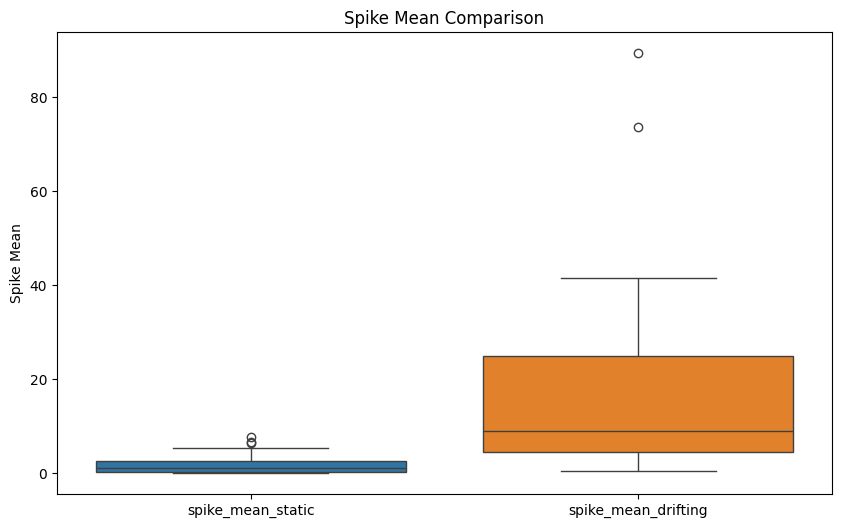

In [39]:
# Summary statistics
print(merged_spikes[['spike_mean_static', 'spike_mean_drifting']].describe())

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_spikes[['spike_mean_static', 'spike_mean_drifting']])
plt.title('Spike Mean Comparison')
plt.ylabel('Spike Mean')
plt.show()

### Hypothesis testing 

H0: there is no difference in mean number of spikes between drifting and static gratings.

In [40]:
# Shapiro-Wilk test for normality

merged_spikes['diff'] = merged_spikes['spike_mean_drifting'] - merged_spikes['spike_mean_static']

shapiro_stat, shapiro_p = stats.shapiro(merged_spikes['diff'])
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

# we select alpha as 0.05
alpha = 0.05
if shapiro_p > alpha:
    print("Differences are normally distributed (fail to reject H0)")
else:
    print("Differences are NOT normally distributed")

Shapiro-Wilk p-value: 0.0000
Differences are NOT normally distributed


Given the differences are not normally distributed we should consider a non parametric test like Wilcoxon signed-rank test to test our null hypothesis.

In [41]:
# Paired t-test (parametric)
t_stat, t_p = stats.ttest_rel(merged_spikes['spike_mean_static'], merged_spikes['spike_mean_drifting'])
print(f"Paired t-test p-value: {t_p:.4f}")

# Wilcoxon signed-rank test (non-parametric)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(merged_spikes['spike_mean_static'], merged_spikes['spike_mean_drifting'])
print(f"Wilcoxon p-value: {wilcoxon_p:.4f}")

Paired t-test p-value: 0.0000
Wilcoxon p-value: 0.0000


We conclude that we can reject H0. There is evidence to suggest that the spike mean is different between static and drifting gratings. This result was expected given the results of the boxplots shown above which demonstrates spike mean is significantly higher in general for units when presented with drifting gratings.

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = merged_spikes[['spike_mean_drifting', 'spike_mean_static']]
y = np.where(merged_spikes['spike_mean_drifting'] > merged_spikes['spike_mean_static'], 1, 0)  # Binary label

clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)
print(f"Classification Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

Classification Accuracy: 1.000 ± 0.000


We see that we can easily build a simply classifier to effectively decode the type of stimulus (static vs drifting) simply from the spike_mean (spike count per presentation).

No we do the same investigation with the spike coefficient of variation (CV=std/mean) to see investigate the difference in variability between static and drifting gratings.

       spike_CV_static  spike_CV_drifting
count        60.000000          60.000000
mean          1.505387           0.840494
std           1.087011           0.421895
min           0.333912           0.306192
25%           0.686148           0.499605
50%           1.066187           0.748730
75%           1.934422           1.031799
max           4.917109           2.025295


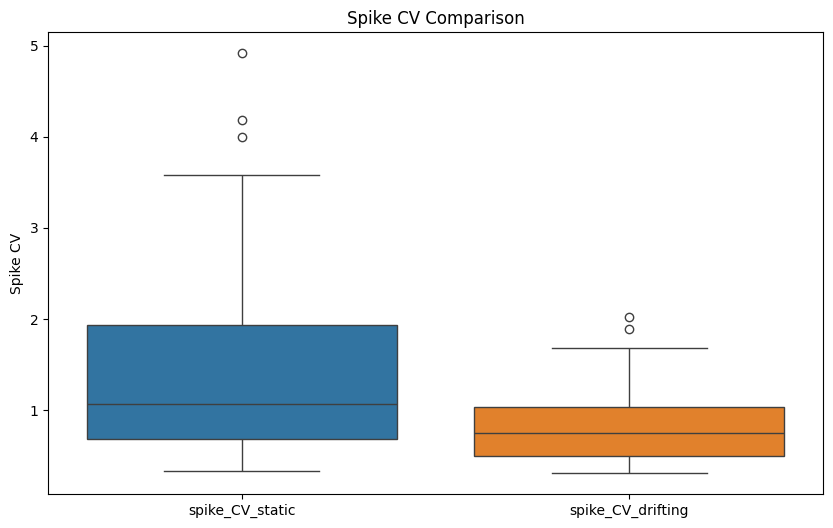

In [47]:
merged_spikes_var = merged_spikes.copy()

# Calculate the coefficient of variation (CV) for static and drifting conditions
merged_spikes_var['spike_CV_static'] = merged_spikes_var['spike_std_static'] / merged_spikes_var['spike_mean_static']
merged_spikes_var['spike_CV_drifting'] = merged_spikes_var['spike_std_drifting'] / merged_spikes_var['spike_mean_drifting']

# Summary statistics
print(merged_spikes_var[['spike_CV_static', 'spike_CV_drifting']].describe())

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_spikes_var[['spike_CV_static', 'spike_CV_drifting']])
plt.title('Spike CV Comparison')
plt.ylabel('Spike CV')
plt.show()


We see that CV is if anything higher for static gratings suggesting a higher variability in static gratings. We again verify if the pairwise differences are normally distributed.

H0: There is no difference between the CV of static and drifting spikes for overlapping units

In [48]:
# Shapiro-Wilk test for normality

merged_spikes_var['diff_CV'] = merged_spikes_var['spike_CV_static'] - merged_spikes_var['spike_CV_drifting']

shapiro_stat, shapiro_p = stats.shapiro(merged_spikes_var['diff_CV'])
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

# we select alpha as 0.05
alpha = 0.05
if shapiro_p > alpha:
    print("Differences in CV are normally distributed (fail to reject H0)")
else:
    print("Differences in CV are NOT normally distributed (reject H0)")

Shapiro-Wilk p-value: 0.0000
Differences in CV are NOT normally distributed (reject H0)


In [49]:
# Paired t-test (parametric)
t_stat, t_p = stats.ttest_rel(merged_spikes_var['spike_CV_static'], merged_spikes_var['spike_CV_drifting'])
print(f"Paired t-test p-value: {t_p:.4f}")

# Wilcoxon signed-rank test (non-parametric)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(merged_spikes_var['spike_CV_static'], merged_spikes_var['spike_CV_drifting'])
print(f"Wilcoxon p-value: {wilcoxon_p:.4f}")

Paired t-test p-value: 0.0000
Wilcoxon p-value: 0.0000


In [50]:
X = merged_spikes_var[['spike_CV_static', 'spike_CV_drifting']]
y = np.where(merged_spikes_var['spike_CV_static'] > merged_spikes_var['spike_CV_drifting'], 1, 0)  # Binary label

clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)
print(f"Classification Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

del merged_spikes_var #Delete this to free up space

Classification Accuracy: 0.967 ± 0.041


We conclude that in fact the Coefficient of Variation (CV) is in fact higher for static gratings than drifting gratings. This difference is also statistically significant. CV can also be used to decode the stimulus type though not quite as effectively.